# Using Lyra for Ly-$\alpha$ Inference 

In [13]:
from lyra import Lyra
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.linewidth'] = 1.2
plt.rcParams['font.family'] = 'serif'
plt.rcParams['xtick.labelsize'] = 7
plt.rcParams['ytick.labelsize'] = 7

In [3]:
#You need to choose an inference model that is based off of galaxy properties
#In this example we are going to use the model that only uses Muv and UV-beta slope

lyra_inference = Lyra('full_SBI_NPE_Muv_beta.pkl')

/Users/oac466/anaconda3/envs/sbi_env/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/oac466/Desktop/lyra/lyra/io_utils.py:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you 


[Model Loaded Successfully]
  • Model key detected: full_SBI_NPE_Muv_beta
  • Expected input dimensionality: 2
  • Required input feature order:
    [Muv, beta]

Please ensure that your input data columns follow this exact order
and have shape (N, 2) before running inference.



# Generating Simulated Data for Inference

In [5]:
muv_data = np.random.uniform(-22, -19, size = 1000).reshape(-1, 1)
beta = np.random.uniform(-3, 2, size = 1000).reshape(-1,1)

data = np.hstack((muv_data, beta))

# Performing the Inference

Note: The input data **must** be in the same format as it was trained in. Thus, please make sure to read the output message once you initialize Lyra and format the data in the order to get a proper inference.

In [6]:
num_samples = 500
lyra_inference.sample(data, num_samples)

/Users/oac466/Desktop/lyra/lyra/evaluation.py:16: UserWarning: Capping max_sampling_batch_size from 10000 to 100 to avoid excessive memory usage.
  samples = posterior.sample_batched((num_samples,), x=x_obs_tensor)


This is a NumPy array, converting to PyTorch Tensor


Drawing 500 samples for 1000 observations: 582it [00:07, 75.33it/s]                         


# Plotting up the Ly-$\alpha$ Distributions

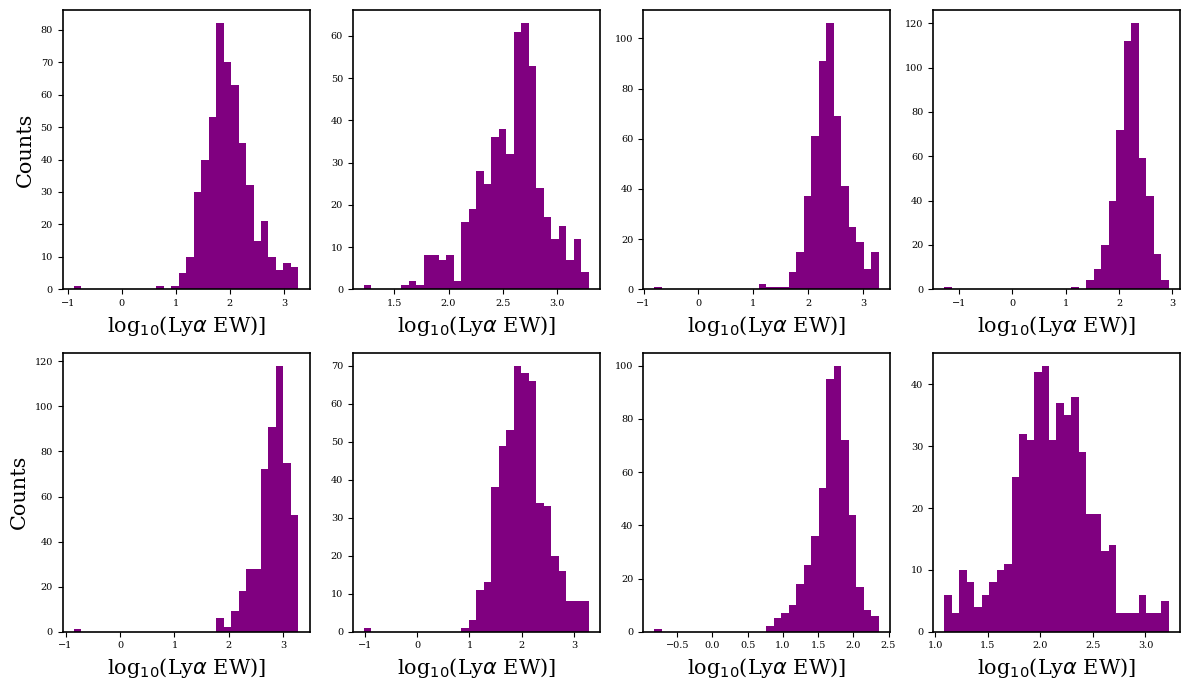

In [19]:
idx = np.arange(0, 1000)
rnd_seed = 1234
np.random.seed(rnd_seed)
random_idx = np.random.choice(idx, replace = False, size = 8)

# we access the samples using the .post_samples method
#This will provide back an N x num_samples array, where N is input galaxies
lya_dist = lyra_inference.post_samples

fs = 15
#We plot random subset of 8 sources
fig, ax = plt.subplots(nrows = 2, ncols = 4, 
                       figsize = (12, 7), 
                       tight_layout = True)

ax = ax.flatten()

for a, i in zip(ax, random_idx):
    
    a.hist(lya_dist[i], bins = 30, color = 'purple')
    a.set_xlabel(r'log$_{10}$(Ly$\alpha$ EW)]', fontsize = fs)


ax[0].set_ylabel('Counts', fontsize = fs)
ax[4].set_ylabel('Counts', fontsize = fs)

plt.show()

# Grabbing the Percentiles

Once you sample to get the Lya EW distribution, Lyra also stores the percentiles to a summary_df method which you can also access. This returns back a DataFrame which holds the 2.5, 16, 50, 84, 97.5 percentiles

In [12]:
lyra_inference.summary_df

,2.5,16,50,84,97.5
0,1.704604,2.210951,2.549858,2.856074,3.149829
1,0.651910,0.906880,1.516774,1.977117,2.807354
2,1.173794,1.476729,1.896401,2.335681,2.983441
3,2.065847,2.495629,2.814589,3.043977,3.253071
4,1.135588,1.542083,1.834151,2.212848,3.057947
...,...,...,...,...,...
995,1.412769,1.766096,2.138123,2.532003,2.818362
996,0.957198,1.311160,1.626591,1.891990,2.109356
997,0.581970,1.108512,1.505625,1.786462,2.100724
998,1.815689,2.189203,2.518782,2.807649,3.080824


# Return Quantities

There is a convenience method to return quantities of interest which are returned back as a tuple:

(The Input Data, The Posterior EW Distributions, Percentile Summary DF)

In [25]:

input_data, post_samples, percentile_summary_df = lyra_inference._return_quantities()

In [23]:
input_data

array([[-20.527414  ,   1.712782  ],
       [-21.763718  ,  -0.24559197],
       [-21.667274  ,   0.99056625],
       ...,
       [-21.754618  ,  -1.8086066 ],
       [-20.026588  ,   0.35726237],
       [-20.891115  ,  -2.9330235 ]], shape=(1000, 2), dtype=float32)

In [24]:
post_samples

array([[1.7329195, 2.013979 , 2.524503 , ..., 2.7068172, 2.7357764,
        2.7868888],
       [2.0723872, 0.883161 , 1.6545664, ..., 0.9679974, 1.5119374,
        1.0807209],
       [1.925473 , 2.0267527, 1.0663894, ..., 1.9902875, 2.1523051,
        2.1632402],
       ...,
       [1.7040968, 1.6432135, 1.3652765, ..., 1.8408744, 1.7242298,
        2.0947711],
       [2.3212004, 2.3699257, 2.6019113, ..., 2.0595045, 2.654595 ,
        2.4815192],
       [1.9542989, 1.7683562, 1.7179161, ..., 1.4305583, 1.8197895,
        1.4793723]], shape=(1000, 500), dtype=float32)

In [26]:
percentile_summary_df

,2.5,16,50,84,97.5
0,1.704604,2.210951,2.549858,2.856074,3.149829
1,0.651910,0.906880,1.516774,1.977117,2.807354
2,1.173794,1.476729,1.896401,2.335681,2.983441
3,2.065847,2.495629,2.814589,3.043977,3.253071
4,1.135588,1.542083,1.834151,2.212848,3.057947
...,...,...,...,...,...
995,1.412769,1.766096,2.138123,2.532003,2.818362
996,0.957198,1.311160,1.626591,1.891990,2.109356
997,0.581970,1.108512,1.505625,1.786462,2.100724
998,1.815689,2.189203,2.518782,2.807649,3.080824
